# Experiments with LVN and LVE

In [1]:
!pip install deeprobust

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import barabasi_albert_graph
from networkx.generators.community import stochastic_block_model
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.generators.community import random_partition_graph

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import math
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import FactorAnalysis

import random
from deeprobust.graph.data import Dataset



No module named 'torch_sparse'


C:\Users\USER\anaconda3\lib\site-packages\deeprobust\graph\data\__init__.py:9: UserWarning: Please install pytorch geometric if you would like to use the datasets from pytorch geometric. See details in https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html
  warnings.warn("Please install pytorch geometric if you " +


# Real Datasets Import

In [3]:
dataset_name = 'cora' #other datatsets : 'citeseer' , 'polblogs' , 'acm'

In [4]:
ori_nodes =  2708
## citeseer : 3312
## cora     : 2708
## polblogs : 1490
## acm      : 3025

In [6]:
data = Dataset(root='', name=dataset_name, setting='gcn',seed=10)
adj, features, labels = data.adj, data.features, data.labels
idx_train, idx_val, idx_test = data.idx_train, data.idx_val, data.idx_test

A = np.array(adj.todense())
X=np.array(features.todense())
np.save("A.npy", A)
print(A)
#np.save("X.npy", X)
print(X)
import numpy as np
b=np.ones(ori_nodes)

z=A@b
D=np.diag(z)
L=D-A
print(L)

Loading polblogs dataset...
Done!
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[26. -1.  0. ...  0.  0.  0.]
 [-1. 45.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ... -1. 18.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]


In [15]:
##ONLY for polblogs

n = 5000
X = np.random.multivariate_normal(np.zeros(1490), np.linalg.pinv(L), n).T
X.shape

(1490, 5000)

#### Minnesota, Airfoil and Bunny datasets have been taken from pygsp library 

In [ ]:
import pygsp as gsp
from pygsp import graphs
G=graphs.Airfoil()
print(G.N)
L=G.L.toarray()
print(L)

# Creating Synthetic Datasets.

In [ ]:
# Some Input parameters.
p=1000 # number of nodes
param = 0.1  
#graph = erdos_renyi_graph(p, param, directed = False)
#graph = nx.barabasi_albert_graph(n=p,m=20)
#graph = watts_strogatz_graph(p,20,param,seed=12)
graph=nx.random_geometric_graph(p,param)


# DISPLAY GENERATED GRAPH.
print(graph.edges)
print(graph.nodes)
# PLOTTING GENERATED GRAPH.
nx.draw(graph, with_labels = True)
plt.title("Laplacian")
plt.show()
# CREATING EDGE WEIGHTS.
W = np.zeros((p, p))
for (x, y) in graph.edges:
    W[x][y] = 1     #weight of edge between x and y
W_t = W + W.T
# CALCULATING LAPLACIAN MATRIX OF GENERATED GRAPH.
L = np.diag(W_t@np.ones((W_t.shape[0]))) - W_t
print(L)
print(L.shape)

In [ ]:
# Creating Fetures for any synthetic graph:
n = 5000 # number of features of each node.
X = np.random.multivariate_normal(np.zeros(p), np.linalg.pinv(L), n).T
X.shape
print(X)

### LVE and LVN 

In [ ]:
import libraries.graph_utils
from libraries.coarsening_utils import *

import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import networkx as nx
import pygsp as gsp
from pygsp import graphs
gsp.plotting.BACKEND = 'matplotlib'

In [ ]:
#Graph Construction using weight matrix.
from pygsp import graphs
import numpy as np
G = graphs.Graph(A) # Real Datasets
G = graphs.Graph(W) # Synthetic Datasets

In [16]:

method = 'variation_neighborhood'  


# Parameters
r    = 0.7 # the extend of dimensionality reduction (r=0 means no reduction)
k    = 100  
kmax = 100
        
C2, Gc, Call, Gall = coarsen(G, K=k, r=r, method=method) 
#metricss = coarsening_quality(GG, CC, kmax)

C:\Users\USER\Downloads\FCG\libraries\coarsening_utils.py:437: RuntimeWarning: invalid value encountered in double_scalars
  return np.linalg.norm(B.T @ L @ B)/(nc-1)


In [17]:
method = 'variation_edges'  

# Parameters
r    = 0.7 # the extend of dimensionality reduction (r=0 means no reduction)
k    = 100  
kmax = 100
        
C1, Gc, Call, Gall = coarsen(G, K=k, r=r, method=method) 

In [ ]:
method = 'kron'  

# Parameters
r    = 0.7 # the extend of dimensionality reduction (r=0 means no reduction)
k    = 100  
kmax = 100
        
C1, Gc, Call, Gall = coarsen(G, K=k, r=r, method=method) 

In [ ]:
method = 'heavy_edge'  

# Parameters
r    = 0.7 # the extend of dimensionality reduction (r=0 means no reduction)
k    = 100  
kmax = 100
        
C1, Gc, Call, Gall = coarsen(G, K=k, r=r, method=method) 

From above, we got, C (coarsened) matrix. We compute Lc using C and then Xc using C.

### Evaluate REE and DE. 

 eigen_error 
(0.882930460794789+0j)


C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


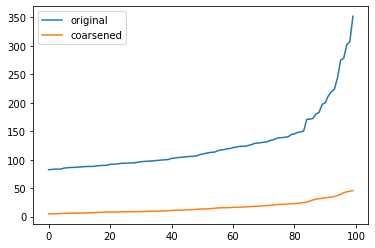

2658757.8433449236
6113760.193609843
1000.7273237140694


In [18]:
C=C2 # or C1
eigen_values,eigenvectors=np.linalg.eig(L)

s=np.sort(eigen_values)

eigen_value,eigenvector=np.linalg.eig(C@L@C.T)

z=np.sort(eigen_value) 
s_new=s[-100:]
z_new=z[-100:]
temp=0
for j in range(len(s_new)):
  temp=temp+(abs(z_new[j]-s_new[j])/s_new[j])
eigenerror=temp/len(s_new)
print(" eigen_error ")
print(eigenerror)
plt.plot(s_new, label="original")
plt.plot(z_new, label="coarsened")
plt.legend()
plt.show()
X_t_0=C@X
print(np.trace(X_t_0.T@C@L@C.T@X_t_0))
#X = np.load('X (5).npy')
print(np.trace(X.T@L@X))
error=np.linalg.norm(X-(C.T@X_t_0))
print(error)    



### Hyperbolic Error 

In [ ]:
def HE(u,v):
    return np.arccosh(1+((pow(np.linalg.norm((u-v)@X),2)*pow(np.linalg.norm(X),2))/(2*np.trace(X.T@u@X)*np.trace(X.T@v@X))))

In [ ]:
L_var=C2.T@C2@L@C2.T@C2
HE(L_var,L)

### Reconstructional Error 

In [ ]:
#For cora
p=2708 # put p = no. of nodes in the graph network. 
L_var=C2.T@C2@L@C2.T@C2
LL=(L-L_var)
np.log(pow(np.linalg.norm(LL),2)/p)